In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Data Exploration and Visualization

Load the dataset 

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
# To check Is there any null values in training data
train_df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Found a null values in 'Arrival Delay in Minutes'

In [6]:
# To check Is there any null values in test data
test_df.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [7]:
train_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [8]:
train_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
train_df.shape

(103904, 25)

In [10]:
test_df.shape

(25976, 25)

**Drop Unimportant data**

🔘 There are two columns Unnamed: 0 and id,These two columns are of no use in the classification. It is better to delete these two columns

In [11]:
column_to_drop=['Unnamed: 0', 'id']
train_df = train_df.drop(column_to_drop, axis=1)

In [12]:
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# visualization

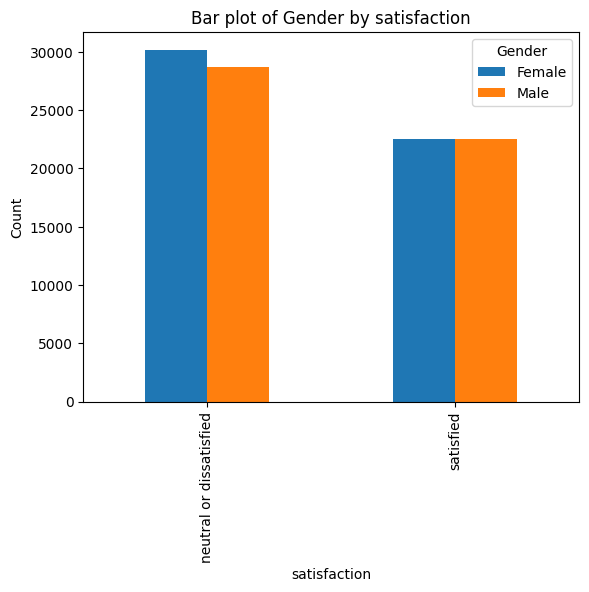

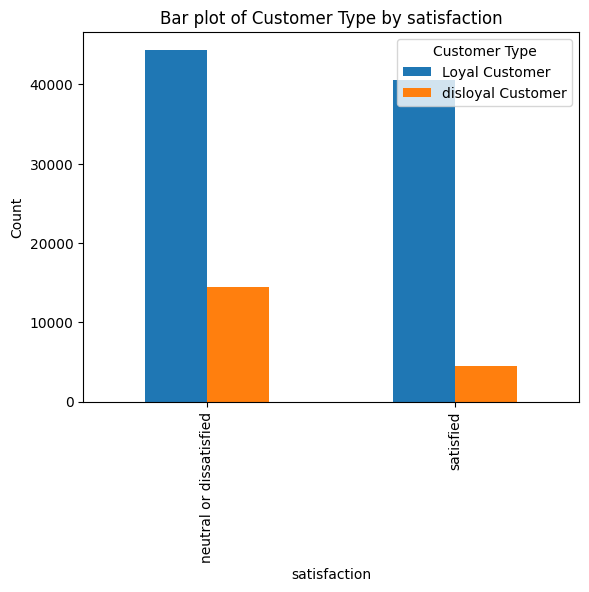

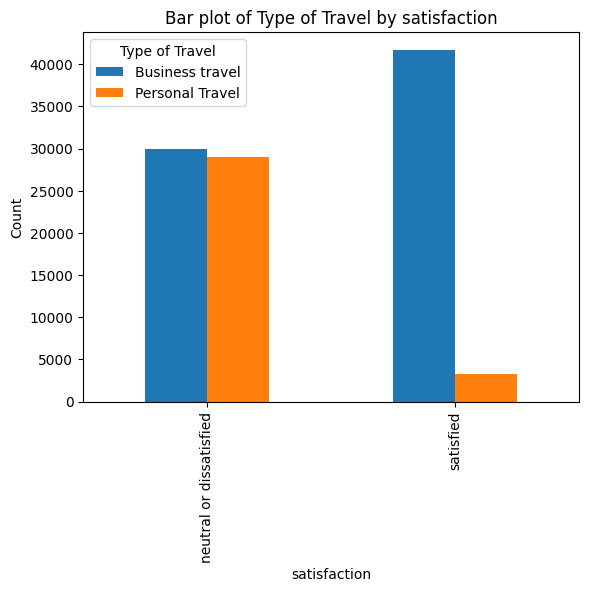

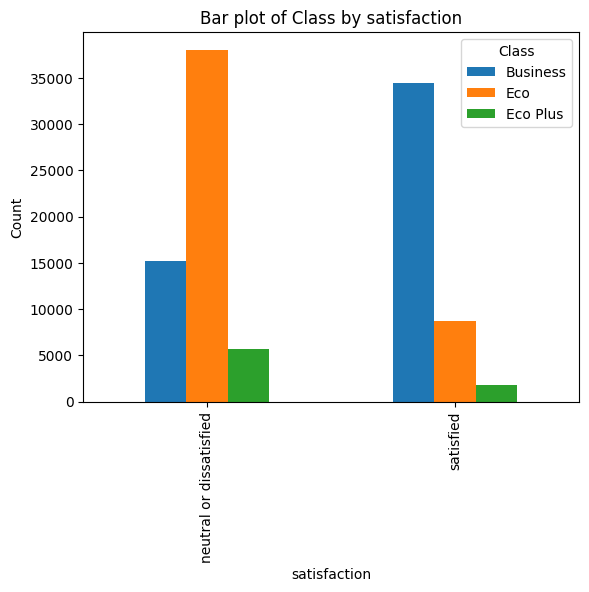

In [13]:
label_data=["Gender","Customer Type","Type of Travel","Class"]

for col in label_data:
    fig, ax = plt.subplots()
    counts = train_df.groupby(['satisfaction',col]).size().unstack()
    counts.plot(kind='bar', ax=ax)
    ax.set_xlabel('satisfaction')
    ax.set_ylabel('Count')
    ax.set_title(f'Bar plot of {col} by satisfaction')
    plt.show()

In [14]:


# Define age groups or bins
age_bins = [0, 18, 30, 40, 50, 60, 100]  # You can adjust the age bins as needed
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']

# Create a new column to store age groups
train_df['Age Group'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels)

# Group the data by age groups
age_groups = train_df.groupby('Age Group')

# Analyze the preferences and needs of different customer groups
for age_group, group_data in age_groups:
    print(f"Age Group: {age_group}")
    
    # You can perform various analyses on the group_data
    # For example, you can calculate the average satisfaction for each group
    avg_satisfaction = group_data['satisfaction'].value_counts(normalize=True)
    print(f"Satisfaction Distribution:")
    print(avg_satisfaction)

    
    # You can also analyze other fields in the dataset
    # For example, you can calculate the average flight distance, type of travel, etc.
    avg_distance = group_data['Flight Distance'].mean()
    print(f"Average Flight Distance: {avg_distance}")
    
    # Add more analysis as needed
    
    print("\n")

# You can add more analysis and visualization based on your specific dataset and requirements.

train_df=train_df.drop('Age Group', axis=1)


Age Group: 0-18
Satisfaction Distribution:
satisfaction
neutral or dissatisfied    0.827253
satisfied                  0.172747
Name: proportion, dtype: float64
Average Flight Distance: 924.7033337074868


Age Group: 19-30
Satisfaction Distribution:
satisfaction
neutral or dissatisfied    0.645882
satisfied                  0.354118
Name: proportion, dtype: float64
Average Flight Distance: 1041.8084954713183


Age Group: 31-40
Satisfaction Distribution:
satisfaction
neutral or dissatisfied    0.566854
satisfied                  0.433146
Name: proportion, dtype: float64
Average Flight Distance: 1185.6216101495072


Age Group: 41-50
Satisfaction Distribution:
satisfaction
satisfied                  0.580025
neutral or dissatisfied    0.419975
Name: proportion, dtype: float64
Average Flight Distance: 1375.9832751411698


Age Group: 51-60
Satisfaction Distribution:
satisfaction
satisfied                  0.572167
neutral or dissatisfied    0.427833
Name: proportion, dtype: float64
Average 

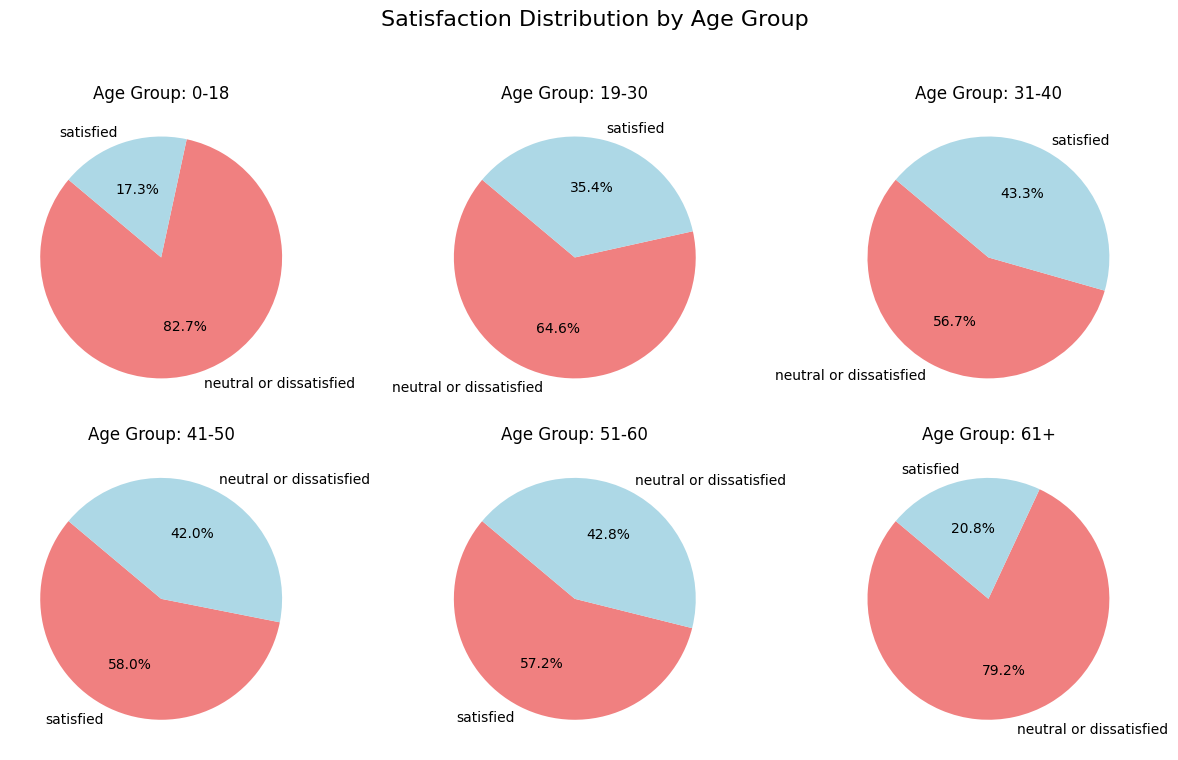

In [15]:

# Create a pie chart for satisfaction distribution in each age group
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

for age_group, group_data in age_groups:
    satisfaction_counts = group_data['satisfaction'].value_counts()
    labels = satisfaction_counts.index
    sizes = satisfaction_counts.values
    plt.subplot(2, 3, age_labels.index(age_group) + 1)
    plt.pie(sizes, labels=labels, colors=['lightcoral', 'lightblue'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Age Group: {age_group}')

plt.suptitle('Satisfaction Distribution by Age Group', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


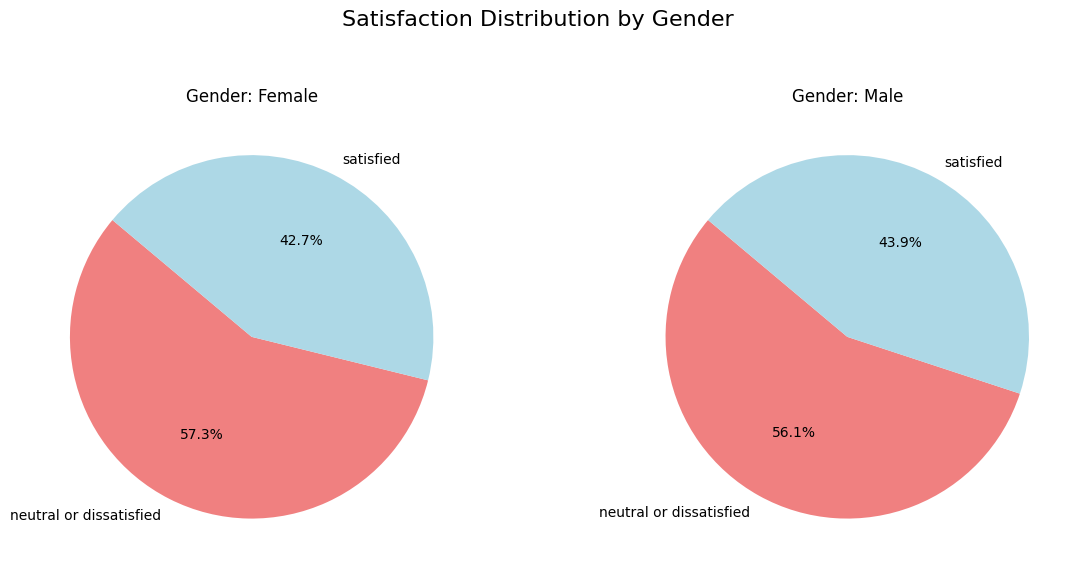

In [16]:
# Group the data by 'Gender'
type_of_travel_groups = train_df.groupby('Gender')

# Create a pie chart for satisfaction distribution for each 'Type of Travel'
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red']

for travel_type, group_data in type_of_travel_groups:
    satisfaction_counts = group_data['satisfaction'].value_counts()
    labels = satisfaction_counts.index
    sizes = satisfaction_counts.values
    plt.subplot(1, len(type_of_travel_groups), list(type_of_travel_groups.groups.keys()).index(travel_type) + 1)
    plt.pie(sizes, labels=labels, colors=['lightcoral', 'lightblue'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Gender: {travel_type}')

plt.suptitle('Satisfaction Distribution by Gender', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

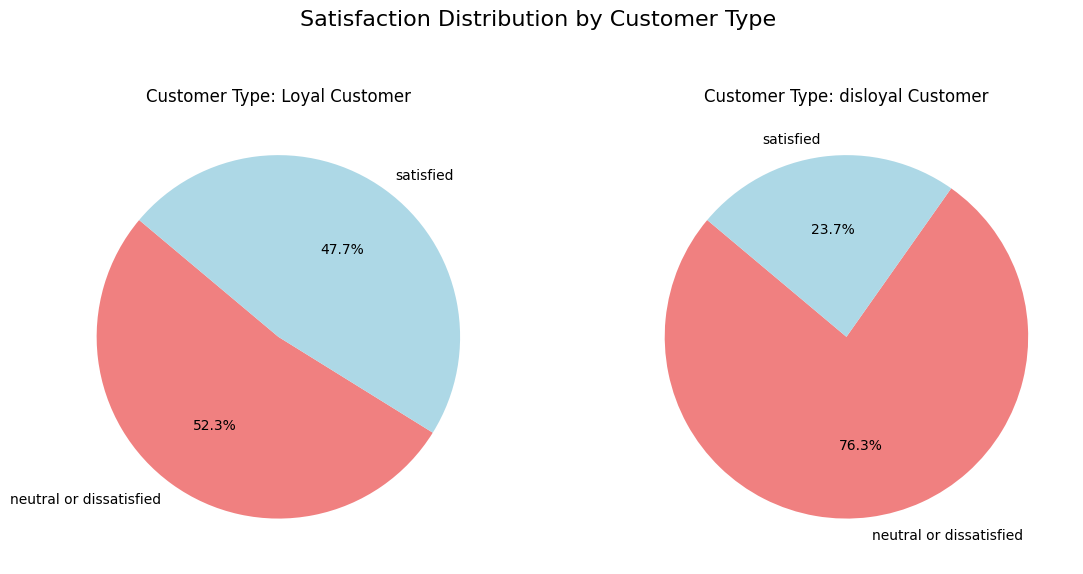

In [17]:
# Group the data by 'Customer Type'
type_of_travel_groups = train_df.groupby('Customer Type')

# Create a pie chart for satisfaction distribution for each 'Type of Travel'
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red']

for travel_type, group_data in type_of_travel_groups:
    satisfaction_counts = group_data['satisfaction'].value_counts()
    labels = satisfaction_counts.index
    sizes = satisfaction_counts.values
    plt.subplot(1, len(type_of_travel_groups), list(type_of_travel_groups.groups.keys()).index(travel_type) + 1)
    plt.pie(sizes, labels=labels, colors=['lightcoral', 'lightblue'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Customer Type: {travel_type}')

plt.suptitle('Satisfaction Distribution by Customer Type', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

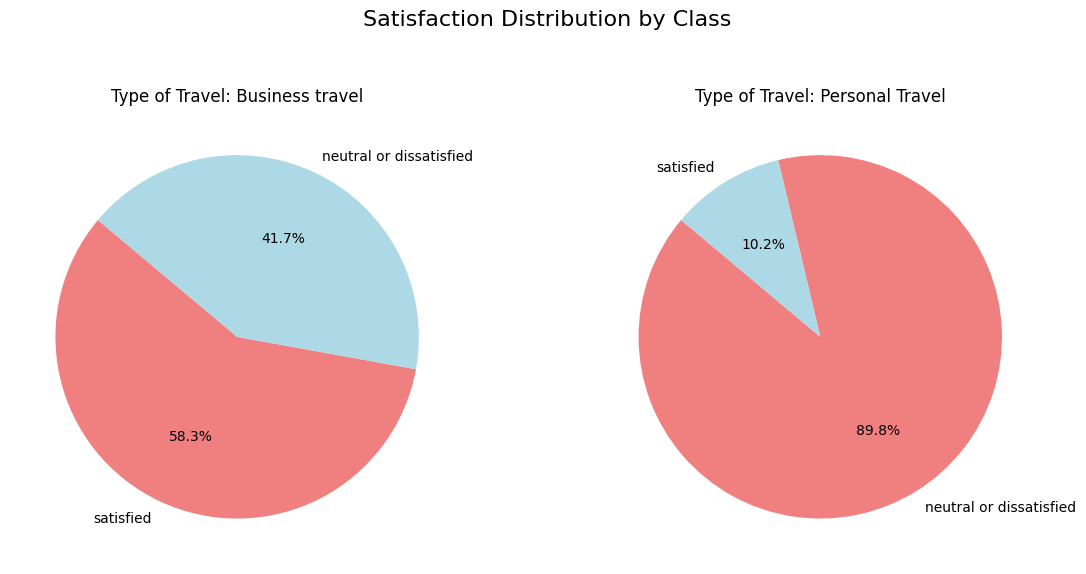

In [18]:
# Group the data by 'Type of Travel'
type_of_travel_groups = train_df.groupby('Type of Travel')

# Create a pie chart for satisfaction distribution for each 'Type of Travel'
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red']

for travel_type, group_data in type_of_travel_groups:
    satisfaction_counts = group_data['satisfaction'].value_counts()
    labels = satisfaction_counts.index
    sizes = satisfaction_counts.values
    plt.subplot(1, len(type_of_travel_groups), list(type_of_travel_groups.groups.keys()).index(travel_type) + 1)
    plt.pie(sizes, labels=labels, colors=['lightcoral', 'lightblue'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Type of Travel: {travel_type}')

plt.suptitle('Satisfaction Distribution by Class', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

In [19]:
#print("accuracy =", round(accuracy * 100, 2), "%")

avg_satisfaction*100

satisfaction
neutral or dissatisfied    79.162487
satisfied                  20.837513
Name: proportion, dtype: float64

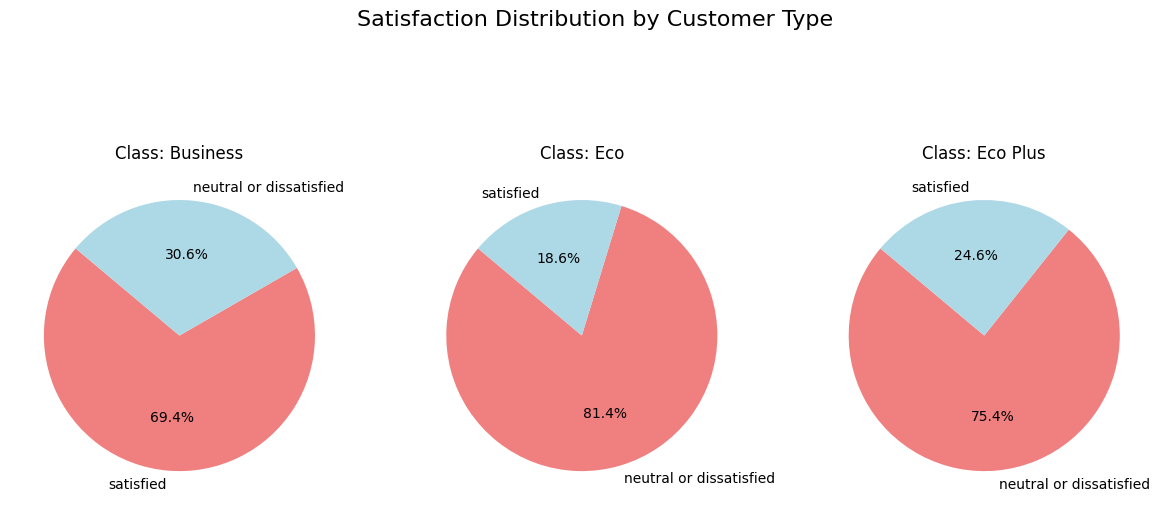

In [20]:
# Group the data by 'Class'
type_of_travel_groups = train_df.groupby('Class')

# Create a pie chart for satisfaction distribution for each 'Type of Travel'
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red']

for travel_type, group_data in type_of_travel_groups:
    satisfaction_counts = group_data['satisfaction'].value_counts()
    labels = satisfaction_counts.index
    sizes = satisfaction_counts.values
    plt.subplot(1, len(type_of_travel_groups), list(type_of_travel_groups.groups.keys()).index(travel_type) + 1)
    plt.pie(sizes, labels=labels, colors=['lightcoral', 'lightblue'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Class: {travel_type}')

plt.suptitle('Satisfaction Distribution by Customer Type', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

# Data Pre-processing

### Encoding

In [21]:
# Categorical variables before encoding
print(train_df['Gender'].unique())
print(train_df['Customer Type'].unique())
print(train_df['Type of Travel'].unique())
print(train_df['Class'].unique())

['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']


In [22]:
obj_data=["Gender","Customer Type","Type of Travel","Class",]
encoder=LabelEncoder()
for col in obj_data:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])
    print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
    

{'Female': 0, 'Male': 1}
{'Loyal Customer': 0, 'disloyal Customer': 1}
{'Business travel': 0, 'Personal Travel': 1}
{'Business': 0, 'Eco': 1, 'Eco Plus': 2}


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

### split data

In [24]:
X_train = train_df.drop('satisfaction', axis=1)  
y_train = train_df['satisfaction']

X_test = test_df.drop('satisfaction', axis=1)  
y_test = test_df['satisfaction']


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Data correlations')

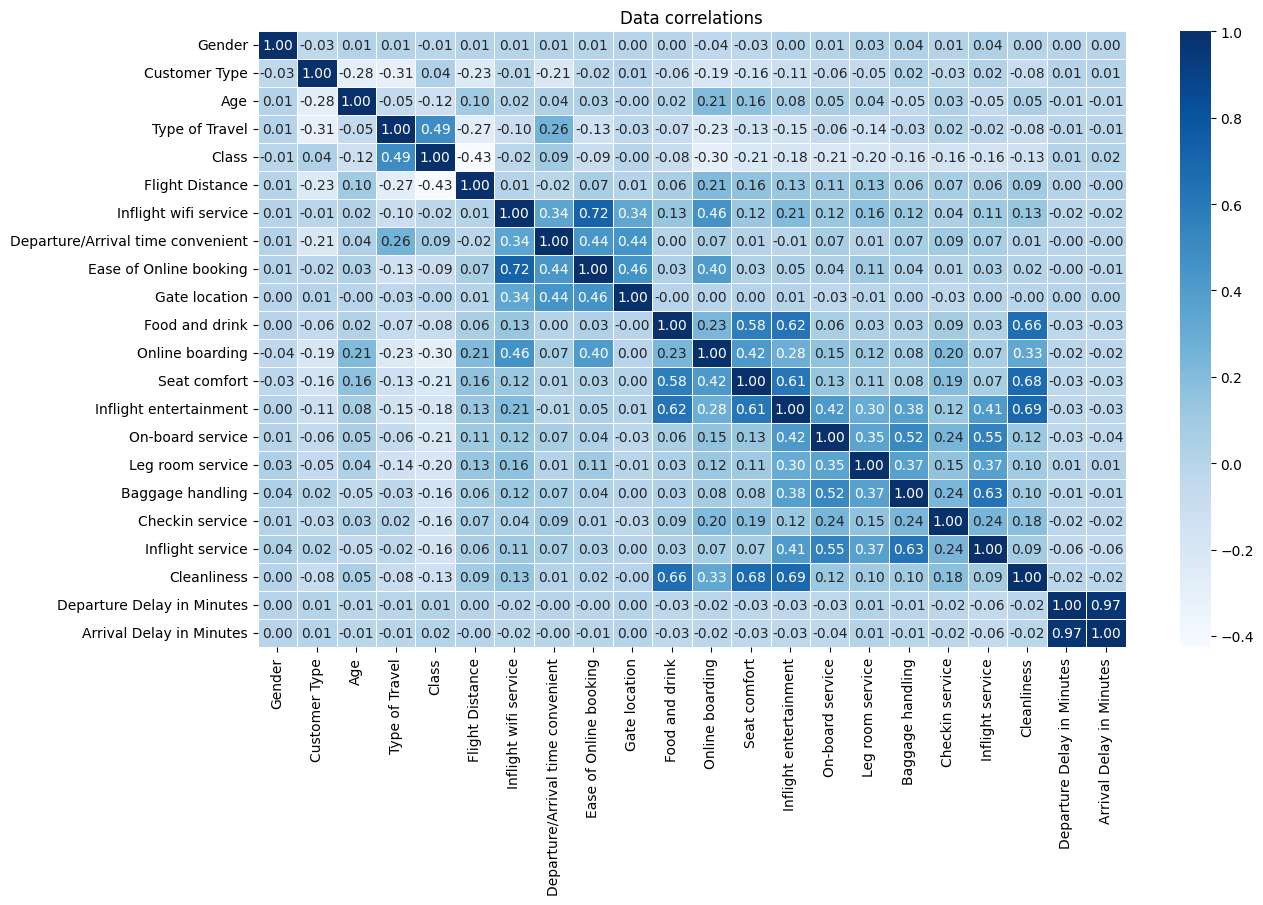

In [25]:
correlation=X_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

### Deal with missing values

In [26]:
X_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
20921,0,0,59,1,1,1046,4,5,4,1,...,5,2,2,4,3,5,2,4,12,3.0
36897,0,1,40,0,0,752,4,4,4,2,...,5,1,4,2,4,3,5,1,19,29.0
8468,1,0,65,1,1,383,2,3,2,1,...,1,1,5,4,5,5,5,1,0,0.0
53490,0,0,70,1,1,2239,3,5,3,4,...,4,5,5,3,5,3,5,5,0,0.0
78687,0,1,25,0,1,1358,2,2,2,3,...,1,1,1,2,3,5,2,1,3,15.0


In [27]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# SimpleImputer() output is a NumPy array, not a DataFrame

# Standardization
Standardization scales features by subtracting the mean and then dividing by the standard deviation. This results in features that have a mean of 0 and a standard deviation of 1.

In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)

X_test_scaled = scaler.transform(X_test_imputed)


# Models

In [29]:
accuracy_dict={}

### 1) SVM

In [30]:
svm=SVC()

svm.fit(X_train_scaled,y_train)

accuracy=svm.score(X_test_scaled, y_test)
accuracy_dict.update({'SVM':accuracy})


In [31]:
accuracy_dict

{'SVM': 0.9543332852124536}

In [32]:
print("accuracy =", round(accuracy * 100, 2), "%")

accuracy = 95.43 %


### 2)Random Forest Classifier

In [33]:
rfc=RandomForestClassifier()

rfc.fit(X_train_scaled,y_train)

accuracy=rfc.score(X_test_scaled, y_test)
accuracy_dict.update({'Random Forest Classifier':accuracy})

print("accuracy =", round(accuracy * 100, 2), "%")

accuracy = 96.22 %


### 3)Gradient Boosting Classifier

In [34]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train_scaled, y_train)

accuracy = gbc.score(X_test_scaled, y_test)
accuracy_dict.update({'Gradient Boosting Classifier':accuracy})

In [35]:
print("accuracy =", round(accuracy * 100, 2), "%")

accuracy = 94.2 %


### 4)Logistic Regression

In [36]:
logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)

accuracy = logreg.score(X_test_scaled, y_test)
accuracy_dict.update({'Logistic Regression':accuracy})

In [37]:
print("Accuracy =", round(accuracy * 100, 2), "%")

Accuracy = 87.77 %


### 5) AdaBoost Classifier

In [38]:
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)

adaboost.fit(X_train_scaled, y_train)

accuracy = adaboost.score(X_test_scaled, y_test)
accuracy_dict.update({'AdaBoost Classifier':accuracy})

/Users/lahiruwijayapala/opt/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [39]:
print("Accuracy =", round(accuracy * 100, 2), "%")


Accuracy = 92.68 %


### 6)KNN

In [40]:
k = 5

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
accuracy_dict.update({'KNN':accuracy})


In [41]:
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 92.97%


# Conclusions

In [42]:
scores_df=pd.DataFrame.from_dict(accuracy_dict,orient='index',columns=['Accuracy'])
scores_df

,Accuracy
SVM,0.954333
Random Forest Classifier,0.962225
Gradient Boosting Classifier,0.941966
Logistic Regression,0.877725
AdaBoost Classifier,0.926760
KNN,0.929695


**Model with Best Performance**

In [43]:
scores_df.loc[scores_df.idxmax()]['Accuracy']

Random Forest Classifier    0.962225
Name: Accuracy, dtype: float64

In [44]:
scores_df.idxmax()

Accuracy    Random Forest Classifier
dtype: object

#### The best accuracy is for Random Forest Classifier: 96.26 %

Epoch 005 - Train Accuracy: 1.0000, Validation Accuracy: 0.9623
Epoch 010 - Train Accuracy: 1.0000, Validation Accuracy: 0.9628
Epoch 015 - Train Accuracy: 1.0000, Validation Accuracy: 0.9629
Epoch 020 - Train Accuracy: 1.0000, Validation Accuracy: 0.9622
Epoch 025 - Train Accuracy: 1.0000, Validation Accuracy: 0.9621
Epoch 030 - Train Accuracy: 1.0000, Validation Accuracy: 0.9624
Epoch 035 - Train Accuracy: 1.0000, Validation Accuracy: 0.9626
Epoch 040 - Train Accuracy: 1.0000, Validation Accuracy: 0.9625


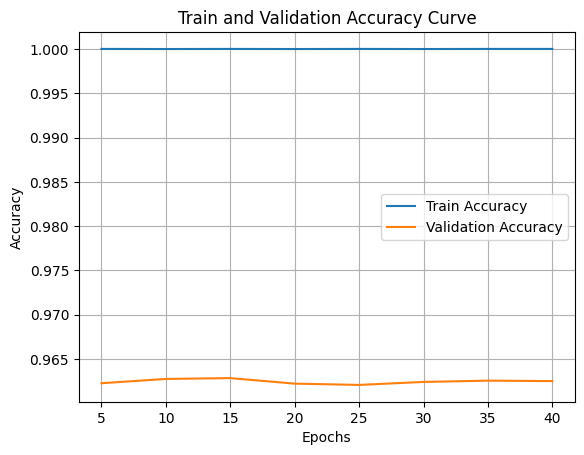

In [45]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier()

# Lists to store training and validation accuracy values
train_accuracies = []
validation_accuracies = []

# Training loop 
for epoch in np.arange(5, 41, 5):
    rfc.fit(X_train_scaled, y_train)  # Fit the model
    y_train_pred = rfc.predict(X_train_scaled)
    y_val_pred = rfc.predict(X_test_scaled)

    # Calculate training and validation accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    validation_accuracy = accuracy_score(y_test, y_val_pred)

    # Append accuracy values to the lists
    train_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)

    print(f'Epoch {epoch:03d} - Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}')

# Plot the training and validation accuracy curves
epochs = np.arange(5, 41, 5)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()


Validation Accuracy does not change with number of epochs

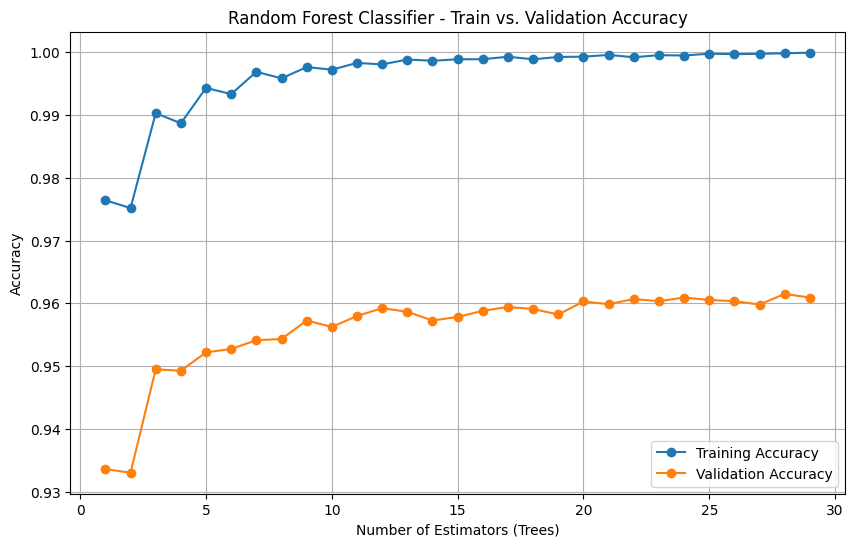

In [46]:

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier()
train_accuracy = []
test_accuracy = []

# Vary the number of estimators (trees) to create the curves
estimator_range = range(1, 30)  # Change this range as needed

for n_estimators in estimator_range:
    rfc.set_params(n_estimators=n_estimators)
    rfc.fit(X_train_scaled, y_train)
    
    # Training accuracy
    train_accuracy.append(rfc.score(X_train_scaled, y_train))
    
    # Validation accuracy
    test_accuracy.append(rfc.score(X_test_scaled, y_test))

# Plot the training and validation accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(estimator_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(estimator_range, test_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier - Train vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


At 'Number of Estimators = 15' classifier reaches best validation accuracy, which doesn't change significantly afterwards.

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

rfc=RandomForestClassifier()

rfc.fit(X_train_scaled,y_train)
rfc.set_params(n_estimators=15)

accuracy=rfc.score(X_test_scaled, y_test)

print("accuracy =", round(accuracy * 100, 2), "%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

accuracy = 96.2 %
Confusion Matrix:
 [[11317   396]
 [ 1065  8003]]
Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.97      0.94     11713
              satisfied       0.95      0.88      0.92      9068

               accuracy                           0.93     20781
              macro avg       0.93      0.92      0.93     20781
           weighted avg       0.93      0.93      0.93     20781



#### Print Feature importances of the trained Random Forrest Classifier Model

In [56]:
importances = rfc.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(feature_importance_df)

                              Feature  Importance
11                    Online boarding    0.167724
6               Inflight wifi service    0.146516
4                               Class    0.099054
3                      Type of Travel    0.094613
13             Inflight entertainment    0.053072
12                       Seat comfort    0.052159
5                     Flight Distance    0.042468
15                   Leg room service    0.037143
8              Ease of Online booking    0.036606
1                       Customer Type    0.033848
2                                 Age    0.031773
14                   On-board service    0.030786
19                        Cleanliness    0.025403
18                   Inflight service    0.025352
16                   Baggage handling    0.025237
17                    Checkin service    0.023501
7   Departure/Arrival time convenient    0.017724
9                       Gate location    0.015904
21           Arrival Delay in Minutes    0.012682


#### Visualizing Feature importances

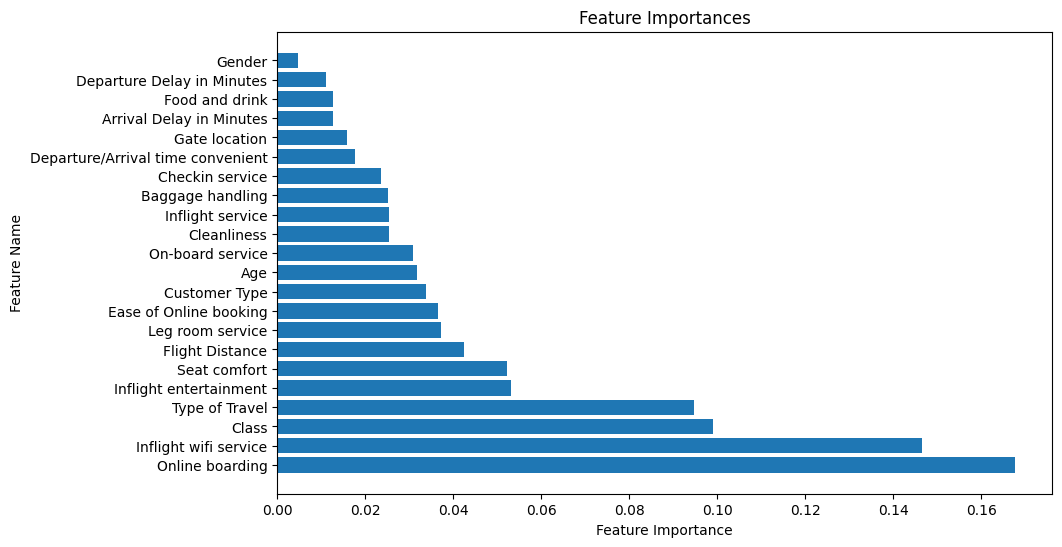

In [57]:
# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances')
plt.show()

## Saving the Model as a pickle

In [58]:
# library for save and load scikit-learn models
import pickle

# file name, I'm using *.pickle as a file extension
filename = "random_forest.pickle"

# save model
pickle.dump(rfc, open(filename, "wb"))

# save data preperation encoder
pickle.dump(imputer, open("imputer.pickle", "wb"))

# save data preperation encoder
pickle.dump(scaler, open("scaler.pickle", "wb"))
